# Human Protein Atlas - Single Cell Classification: Scientific Introduction and Exploratory Data Analysis

## Introduction 

Proteins play a role in all cellular processes.  Microscopy makes it possible to study differences in the localization of proteins within a population of cells.  Different proteins are at a specific location in the cell to perform a specific reaction.  Different subcellular distributions of a single protein may result in different reactions between cells.  Understanding these differences and how it affects cellular functioning may help in the understanding how diseases develop and how to develop treatments (The Human Protein Atlas).

The Human Protein Atlas is aimed at mapping proteins in all human organs, tissues, and cells.  Data from this atlas is provided to develop models capable of segmenting and classifying each individual cell by classifying protein localization patterns (The Human Protein Atlas).  

The purpose of this notebook is to explain the basic science and techniques behind the data and to explore the data for this competition.

## Import Dependencies

In [ ]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip

In [ ]:
import warnings
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
from IPython.display import display, HTML, YouTubeVideo, Image

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

## What is a Cell and What is its Components?

The cell is the smallest unit of structure and function in living organisms.  An organism can be unicellular or multicellular.  Organelles are small cellular structures that carry out specific functions within the cell, such as protein synthesis, energy production, and lipid synthesis.  Examples of cellular organelles are the nucleus, mitochondrion, endoplasmic reticulum, and golgi apparatus.  Biological macromolecules are large essential biological molecules built from smaller organic molecules.  These molecules make up organelles.  Example of biological macromolecules are carbohydrates, lipids, proteins, and nucleic acids (Douglas et al. 2018).  

The cytoskeleton is a network of protein fibers that serve several functions in the cell.  The functions of the cytoskeleton are helping to maintain cellular shape, help with movement of vesicles in the cell, secure organelles, and enable cellular movement.  The three protein fibers in the cytoplasm are microfilaments, intermediate filaments, and microtubules (Douglas et al. 2018).

Below is a diagram of the cell along with its main organelle.  Each organelle has its distinct function (Douglas et al. 2018).  

In [ ]:
html1 = '<img src="https://openstax.org/resources/cfcddc2f9771c9b78b782121ca741d3d39d760e5" width="475" height="475" align="center"/>'
HTML(html1)

Douglas, Matthew, et al. Biology 2e. Rice University, 2018. 

Creative Commons Attribution License v4.0

## What is a protein?

Proteins are a type of biological macromolecule in the cell.  Proteins are distributed throughout the cell and play a role in all cellular processes.  Each cell contains thousands of proteins with a distinct structure and function (Douglas et al. 2018).  The table below from Douglas et al. describes the primary functions of proteins.

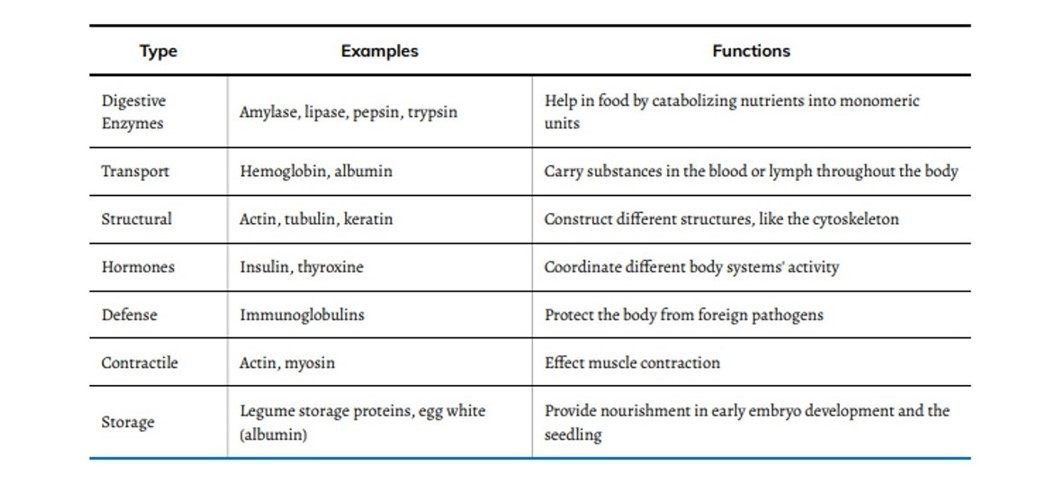
Douglas, Matthew, et al. Biology 2e. Rice University, 2018. 

### How are Proteins Made in the Cell?

The central dogma explains the creation of proteins in the cell.  The central dogma states that DNA gets transcribed to a type of RNA, called messenger RNA (mRNA), through a process called transcription.  Then, the central dogma states that the protein gets created from the mRNA through a process called translation (Douglas et al 2018).  

The image below shows the general process of protein synthesis.  The nucleotide sequence from the genes in DNA determines the sequence of mRNA.  Once the mRNA is created, it undergoes processing before translation occurs. When translation occurs, the mRNA sequence determines the sequence of molecules, called amino acids, that make up the proteins.  The amino acid sequence determines the structure and function of the protein (Douglas et al 2018). 

In [ ]:
html1 = '<img src="https://openstax.org/resources/abdd78d09479f6d641ea2add24d0634f8bd27358" width="325" height="375" align="center"/>'
HTML(html1)

Douglas, Matthew, et al. Biology 2e. Rice University, 2018. 

### How are proteins structured?

Amino acids are the special molecules that comprise of proteins.  The general structure of a protein is pictured below.  Amino acids have an amino group, carboxyl group, and a side chain or R chain (Douglas et al 2018).

In [ ]:
html1 = '<img src="https://openstax.org/resources/2865acded8ea7aa2d3d546fabbb83fa45b26691f" width="325" height="375" align="center"/>'
HTML(html1)

There are twenty different types of amino acids.  The amino acids have similar structure.  They differ in their side chain or R group.  The differences in R group is what creates the differences in structure and function in proteins.  Below are the different R groups for the amino acids.  It might be overwelming to look at all the structures.  The point is not to memorize the structures but to understand the differences in the structure and how these differences may influence protein structure and function (Douglas et al 2018).

In [ ]:
html1 = '<img src="https://openstax.org/resources/e908e753f6bc0aa6125eae3b539fd5451c9acf95" width="550" height="600" align="center"/>'
HTML(html1)

Douglas, Matthew, et al. Biology 2e. Rice University, 2018. 

The image below shows the four levels of protein structure.  The four levels of protein structure is the primary structure, the secondary structure, the tertiary structure, and the quaternary structure.  Differences in protein structure can be caused by mutations and denaturation (Douglas et al 2018).  

When a mutation occurs, there is a change in nucleotide sequence of DNA.  This causes a different amino acid in the growing polypeptide chain during translation.  This causes a change in the protein structure, which then causes a change in the protein function or causes the protein to dysfunction (Douglas et al 2018).

When a protein gets exposed to a certain temperature, pH level, or chemical, it may undergo denaturation.  This causes changes in the protein structure without changing the primary structure.  Denaturation may be reversible or irreversible (Douglas et al 2018).

In [ ]:
html1 = '<img src="https://openstax.org/resources/be389460373b6ab7b1f229e88ab84a9ea599357e" width="450" height="500" align="center"/>'
HTML(html1)

Douglas, Matthew, et al. Biology 2e. Rice University, 2018. /(credit: modification of work by National Human Genome Research Institute)

### How are Proteins Detected in the Cell?

There are different ways to observe proteins in the cell.  In this competition, the methods of observing proteins were immunocytochemistry and confocal microscopy.  These two methods were used together to create the images used in the competition (The Cell Atlas).

#### Immunocytochemistry

There are four main steps to immunocytochemistry (ICC-IF) (Learn: Immunocytochemistry). 
1. Seed Cell
2. Immunostaining
3. Visualize using Microscopy
4. Evaluate using Computer Software

The first step of immunocytochemistry is to seed the cell on a glass plate or glass slide and incubate for the proper incubation time for the cell line.  The incubation may span from 30 minutes to 24 hours (Learn: Immunocytochemistry).

The second step of immunocytochemistry is immunostaining.  There are several steps to immunostaining (Learn: Immunocytochemistry).
1. Fixation - This step preserves the structural state of the protein at the time of fixation and their location in the cell.
2. Permeabilization - This step enables the antibodies to cross the cell membranes by puncturing the cell membranes with chemicals such as detergents and solvents.
3. Antibody Incubation - During this step, the antibody binds to the desired protein.  It is important to wash unbound antibodies by washing to avoid improper staining.


After antibody incubation, immunofluorescence takes place.  Immunofluorescence visualizes the protein of interest with a fluorescent tag.  Since this method was used with a cell line, it is referred to as immunocytochemistry (sinobiological).

Immunofluorescence detects the desired protein using antibodies.  These antibodies are specific to only the protein of interest (sinobiological).

There are two types of immunofluorescence: primary immunofluorescence and secondary immunofluorescence.

In the primary immunofluorescence method, there is a single type of antibody for the protein called the primary antibody.  The primary antibody has the fluorescent molecule, called a fluorophore, attached to the antibody (Direct vs Indirect Immunofluorescence).

In the secondary immunofluoresence method, there are two types of antibodies used.  The first type of antibody or the primary antibody attaches to the protein and does not have the fluorescent protein, which is called the fluorophore.  The second type of antibody or the secondary antibody attaches to the primary antibody.  The secondary antibody has the fluorophore attached to it (Direct vs Indirect Immunofluorescence).

Below shows the difference between the primary and secondary immunofluorescence method.  Note that the term epitope means the location where the antibody attaches to the antigen (or protein in this competition).

In [ ]:
html1 = '<img src="https://upload.wikimedia.org/wikipedia/commons/4/45/Immunofluorescence.jpg" width="525" height="575" align="center"/>'
HTML(html1)

Wikimedia, Westhayl618, Creative Commons Attribution-Share Alike 4.0 International License

The third step of immunocytochemistry is using microscopy.  There are different types of microscopy used in immunocytochemistry.  The type of microscopy used in this competition was confocal microscopy (Learn: Immunocytochemistry).

The forth step of immunocytochemistry is to evaluate with computer software (Learn: Immunocytochemistry).

#### Confocal Microscopy

There are different types of microscopy used in immunocytochemistry.  Most types of microscopy used in immunocytochemistry use some form of fluorescent microscopy.  This type of microscopy excites the fluorescent protein to show the location of an antigen, such as a protein, in the cell.  Confocal microscopy has a higher resolution than traditional fluorescence microscopy (Quantum made easy).  The video below is an introductory video about the basics of confocal microscopy.

In [ ]:
YouTubeVideo('kPvG99uvW2g', width=800, height=450)

“What Is Confocal Microscopy?” YouTube, YouTube, 3 June 2020, www.youtube.com/watch?v=kPvG99uvW2g. 

#### How to View Image Data

When exploring the data files, it is apparent that the images are black and white and that there are multiple image files, as shown below.  However, if the image is viewed in the microscope, the cellular structures appears in bright colors and most cellular images are singular images with multiple cellular organelles.  This is because many microscopes have cameras that only capture black and white images.  There are four different images because the fluorescent proteins become excited at different wavelengths, thus causing different filters to be used.

In [ ]:
#Visualize images has original .png files
#Function modification from function from notebook Human Protein Atlas Cell Segmentation + [EDA] by Kuldeep Singh Chouhan

def read_sample_image_black (filename):
    
    red = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_red.png", cv2.IMREAD_UNCHANGED)
    green = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_green.png", cv2.IMREAD_UNCHANGED)
    blue = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_blue.png", cv2.IMREAD_UNCHANGED)
    yellow = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_yellow.png", cv2.IMREAD_UNCHANGED)
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 4, 1)
    plt.imshow(red, cmap = 'gray')
    plt.title('Microtubule channels')
    plt.axis('off')
    plt.subplot(1, 4, 2)
    plt.imshow(green, cmap = 'gray')
    plt.title('Protein of Interest')
    plt.axis('off')
    plt.subplot(1, 4, 3)
    plt.imshow(blue, cmap = 'gray')
    plt.title('Nucleus')
    plt.axis('off')
    plt.subplot(1, 4, 4)
    plt.imshow(yellow, cmap = 'gray')
    plt.title('Endoplasmic Reticulum')
    plt.axis('off')
    plt.show()

In [ ]:
read_sample_image_black ('f510ca4c-bbab-11e8-b2ba-ac1f6b6435d0')

To be able to view the image with the proper channels, color will need to be added to the images and then an overlay will need to be created of these four images.  This can be done with software but can also be done on python.  The overlay below was created using code from the notebook [Human Protein Atlas Cell Segmentation + [EDA]](https://www.kaggle.com/kool777/human-protein-atlas-cell-segmentation-eda) by Kuldeep Singh Chouhan.

In [ ]:
# read and visualize sample image
#Function modification from function from notebook Human Protein Atlas Cell Segmentation + [EDA] by Kuldeep Singh Chouhan

def read_sample_image(filename):
    
    red = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_red.png", cv2.IMREAD_UNCHANGED)
    green = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_green.png", cv2.IMREAD_UNCHANGED)
    blue = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_blue.png", cv2.IMREAD_UNCHANGED)
    yellow = cv2.imread(os.path.join('../input/hpa-single-cell-image-classification/train/') + filename + "_yellow.png", cv2.IMREAD_UNCHANGED)

    stacked_images = np.transpose(np.array([red, green, blue, yellow]), (1,2,0))
    return stacked_images

def plot_all(im):
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 5, 1)
    plt.imshow(im[:,:,:3])
    plt.title('RGBY Image')
    plt.axis('off')
    plt.subplot(1, 5, 2)
    plt.imshow(im[:,:,0], cmap='Reds')
    plt.title('Microtubule channels')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.imshow(im[:,:,1], cmap='Greens')
    plt.title('Protein of Interest')
    plt.axis('off')
    plt.subplot(1, 5, 4)
    plt.imshow(im[:,:,2], cmap='Blues')
    plt.title('Nucleus')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.imshow(im[:,:,3], cmap='Oranges')
    plt.title('Endoplasmic Reticulum')
    plt.axis('off')
    plt.show()
    
def plot_rgby (im):
    
    plt.figure(figsize=(10,10))
    plt.imshow(im[:,:,:3])
    plt.title('Overlay Image')
    plt.axis('off')
    plt.show()

There are four different filters.  The protein of interest is green, the nucleus is blue, the microtubules are red, and the endoplasmic reticulum is yellow.   The green filter should be used for prediction and the other filters should be used for references.

In [ ]:
im = read_sample_image ('f510ca4c-bbab-11e8-b2ba-ac1f6b6435d0')
plot_all (im)

## Exploratory Data Analysis

### How Many Tags Do Each Organelle and Image Have?

The first step in exploratory data analysis is to analyze how many tags each organelle has and how many tags each image has.

In [ ]:
# Import dataframe

train_df = pd.read_csv('../input/hpa-single-cell-image-classification/train.csv')
train_df.head ()

In [ ]:
label_names= {
0: "Nucleoplasm",
1: "Nuclear membrane",
2: "Nucleoli",
3: "Nucleoli fibrillar center",
4: "Nuclear speckles",
5: "Nuclear bodies",
6: "Endoplasmic reticulum",
7: "Golgi apparatus",
8: "Intermediate filaments",
9: "Actin filaments",
10: "Microtubules",
11: "Mitotic spindle",
12: "Centrosome",
13: "Plasma membrane",
14: "Mitochondria",
15: "Aggresome",
16: "Cytosol",
17: "Vesicles and punctate cytosolic patterns",
18: "Negative"
}

def fill_targets(row):
    row.Target = np.array(row.Label.replace("|", " ").split()).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [ ]:
for key in label_names.keys():
    train_df[label_names[key]] = 0

In [ ]:
#Create dataframe

train_df = train_df.apply(fill_targets, axis=1)

train_df = train_df.drop(['Label'], axis=1)

#Create the Dataframe for the sum of Organelles

organelle_df = train_df.drop(['ID'], axis = 1)

organelle_df = organelle_df.sum (axis=0)

In [ ]:
#Create the Dataframe for the sum of Labels

id_df = train_df.sum (axis=1)

labels = []
ones = []

for i in id_df:
    if i == 1:
        number = "one"
        addition = 1
        labels.append (number)
        ones.append (addition)
    elif i == 2:
        number = "two"
        addition = 1
        labels.append (number)
        ones.append (addition)
    elif i == 3:
        number = "three"
        addition = 1
        labels.append (number)
        ones.append (addition)
    elif i == 4:
        number = "four"
        addition = 1
        labels.append (number)
        ones.append (addition)
    elif i == 5:
        number = "five"
        addition = 1
        labels.append (number)
        ones.append (addition)

id_df = pd.DataFrame({'Label': labels, 'Addition': ones})
id_df = id_df.groupby(['Label']).sum ()
id_df = pd.DataFrame({"Number of Cells": [10508, 8873, 2233, 190, 2]}, index = ["One", "Two", "Three", "Four", "Five"])

In [ ]:
#Create organelle pie graph

organelle_df.plot (kind = 'pie', 
                   ylabel = '', 
                   figsize = (12,12), 
                   fontsize = 12, 
                   pctdistance = 1)

plt.title ('Number of Labels Per Organelle', fontsize = 16, y = 1)
plt.show ()

The nucleoplasm and cytosol have the most labels.

In [ ]:
#Create label pie graph 

data = np.array ([10508, 8873, 2233, 190, 2])
id_series = pd.Series (data, index = ["One", "Two", "Three", "Four", "Five"])

id_series.plot (kind = 'pie',
                   #colors = colors,
                   ylabel = '', 
                   figsize = (13,13), 
                   fontsize = 9, 
                   pctdistance = 1)

plt.title ('Number of Labels Per Image', fontsize = 16, y = 1)
plt.show ()

Most of the images either have one or two labels.

### What are the most common multiple labels?

The second step in exploratory data analysis is to find the highest amount of tags for multiple categories for each category.  The catgories are two, three, four, and five.

In [ ]:
#Add the amount of Labels for each sample

multiple_labels = '../input/hpa-single-cell-image-classification/train.csv'
amount_df = pd.read_csv (multiple_labels)
amount_df = amount_df.drop(['ID'], axis = 1)

amount_df

counted_labels = train_df.sum (axis=1)

amount_df['Amount'] = counted_labels

# Remove Label Where there is only One Label

amount_df = amount_df[amount_df.Amount != 1]

#Evalute 2 labels only

two_df = amount_df[amount_df.Amount == 2]

two_append = []

for i in range (0, len (two_df)):
    two_append.append (1)

finaltwo_df = pd.DataFrame() 
finaltwo_df['Label'] = two_df['Label']
finaltwo_df['Amount'] = two_append

finaltwo_df = finaltwo_df.groupby(['Label']).sum ().reset_index()
finaltwo_df = finaltwo_df.sort_values(by = ['Amount'], ascending = False)
finaltwo_df = finaltwo_df.head (1)

#Evalute 3 labels only

three_df = amount_df[amount_df.Amount == 3]

three_append = []

for i in range (0, len (three_df)):
    three_append.append (1)

finalthree_df = pd.DataFrame() 
finalthree_df['Label'] = three_df['Label']
finalthree_df['Amount'] = three_append

finalthree_df = finalthree_df.groupby(['Label']).sum ().reset_index()
finalthree_df = finalthree_df.sort_values(by = ['Amount'], ascending = False)
finalthree_df = finalthree_df.head (1)

#Evalute 4 labels only

four_df = amount_df[amount_df.Amount == 4]

four_append = []

for i in range (0, len (four_df)):
    four_append.append (1)

finalfour_df = pd.DataFrame() 
finalfour_df['Label'] = four_df['Label']
finalfour_df['Amount'] = four_append

finalfour_df = finalfour_df.groupby(['Label']).sum ().reset_index()
finalfour_df = finalfour_df.sort_values(by = ['Amount'], ascending = False)
finalfour_df = finalfour_df.head (1)

#Evalute 5 labels only

five_df = amount_df[amount_df.Amount == 5]

five_append = []

for i in range (0, len (five_df)):
    five_append.append (1)

finalfive_df = pd.DataFrame() 
finalfive_df['Label'] = five_df['Label']
finalfive_df['Amount'] = five_append

finalfive_df = finalfive_df.groupby(['Label']).sum ().reset_index()
finalfive_df = finalfive_df.sort_values(by = ['Amount'], ascending = False)
finalfive_df = finalfive_df.head (1)


#Combine Dataframe

total_df = finaltwo_df.append(finalthree_df, ignore_index=True)
total_df = total_df.append(finalfour_df, ignore_index=True)
total_df = total_df.append(finalfive_df, ignore_index=True)

total_df

For two labels, the most common label has the cytosol and nucloplasm labeled.  For three labels, the most common label has the cytosol, nucloplasm, and plasma membrane labeled.  For four labels, the cytosol, nucleoli, nucleoplasm, and plasma membrane are labeled.  For five labels, the cytosol, mitochondria, nuclear bodies, nucleoli fibrillar center, and nucleoplasm are labeled.

### How Do the Organelles Appear Microscopically and What Are Their Functions?

The second part of exploratory data analysis is to observe what the data looks like for each organelle by observing one image for each organelle.

#### 1. Nucleoplasm

The nucleoplasm is a semi-solid fluid that is inside the nucleus (Douglas et al 2018).  The nucleoplasm can be stained with DAPI, which is a special dye that binds to certain nucleotides, which appears as blue in the image.  DAPI does not bind to the nucleoli becuase there are lower amounts of DNA in that area.  The greeen in the protein is the protein of interest.  The protein of interest staining may vary according to the amount of protein in the cell and the spatial arragement of the protein (Nucleoplasm).  As shown below, the protein of interest in the nucleoplasm will show up throughout the area of the nucleus.  The overlay image shows that there is a stong dispersion between the protein of interest in the nucleoplasm and the nucleus.

**Nucleoplasm Image 1**

In the overlay image, the protein of interest is strongly observed in the top right cells in the image.  The lack of nucleoli in the nucleus is also observed.

In [ ]:
im = read_sample_image ('daa22470-bbca-11e8-b2bc-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

**Nucleoplasm Image 2**

In the overlay image, the protein of interest is observed in the cells in the image.  There is more of a punctate staining of the protein of interest in the nucleoplasm of the cell.

In [ ]:
im = read_sample_image ('f510ca4c-bbab-11e8-b2ba-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 2. Nuclear Membrane

The nuclear membrane is a membrane that encloses the nucleus and isolates the nucleus from the cell (Nuclear Membrane).  As shown below, the protein of interest in the nuclear membrane will show up and in the area around the nucleus.  The overlay image shows that the protein of interest in the nuclear membrane shows around the nucleus.  In some of the cells, the protein of interest is viewed around in and inside of the nucleus.

In [ ]:
im = read_sample_image ('0881d08c-bb9b-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 3. Nucleoli

The nucleolus (plural: nucleoli) is a non-membrane bound subcompartment of the nucleus.  It is the area of the nucleus where ribosome synthesis and assembly takes place.  Ribosomes are then transported to the cytoplasm so they can participate in protein translation (Nucleoli; Nucleoli Fibrillar Center).  

There are four regions of the nucleolus (Nucleoli Fibrillar Center):
1. Nucleoli Fibrillar Center
2. Dense Fibrillar Component
3. Grandular Component
4. Perinucleolar Region

As shown below, the protein of interest in the nucleolus will show up in the nucleus.  The overlay image shows that the protein of interest in the nucleoli in the nucleus.

In [ ]:
im = read_sample_image ('64ab5506-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 4. Nucleoli Fibrillar Center

The nucleoli fibrillar center is a region of the nucleoli.  As mentioned above, the nucleolus contains four regions: nucleoli fibrillar center, dense fibrillar component, grandular component, and perinucleolar region.  There are proteins between the border of the fibrillar center and dense fibrillar components that transcribes pre-rRNA from DNA (Nucleoli Fibrillar Center). 

There is a protein in the nucleoli fibrillar center called NOLC1.  When this protein is imaged using immunocytochemistry and fluorescent microscopy, the nucleoli fibrillar center appears.  This protein has the function of maintaining the structure of fibrillar center and the dense fibrillar components.  This protein also interacts with a protein, which is an enzyme, that transcribes pre-rRNA from DNA.  This protein shows how proteins play a role in keeping structural integretary and what they may reveal about the reactions occuring at a certain cellular structure and location (Nucleoli Fibrillar Center).

As shown below, the protein of interest in the nucleoli fibrillar center will show up in the nucleoli.  The overlay image shows that the protein of interest in the nucleoli fibrillar center in the nucleoli.

In [ ]:
im = read_sample_image ('6a70893e-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 5. Nuclear Speckles

Nuclear speckles are clusters enriched in pre-mRNA splicing factors, such as spliceosomes.  As described above, pre-mRNA has to undergo processing before translation can occur.  One way pre-mRNA undergoes processing is through removing extra pieces of RNA that do not belong in the final mRNA molecule.  This extra pieces of RNA is called an intron.  The coding part of RNA is called an exon (Douglas et al 2018; Nuclear Speckles).  

In [ ]:
html1 = '<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Pre-mRNA_to_mRNA_MH.svg" width="400" height="400" align="center"/>'
HTML(html1)

Wikimedia, Mutundis, Creative Commons Attribution-Share Alike 3.0 Unported License

The spliceosomes removes the intron in the molecule and reconnect the exons togethers.  Below is an image of a spliceosome after the splicing reaction.  The intron of the mRNA is shown in yellow, proteins are shown in blue and green, and the spliceosome RNA molecules are shown in magneta and pink (PDB101: Molecule of the Month: Spliceosomes).

In [ ]:
html1 = '<img src="https://cdn.rcsb.org/pdb101/motm/images/245-Spliceosomes-3jb9.jpg" width="400" height="400" align="center"/>'
HTML(html1)

The RCSB PDB "Molecule of the Month": Inspiring a Molecular View of Biology D.S. Goodsell, S. Dutta, C. Zardecki, M. Voigt, H.M. Berman, S.K. Burley (2015) PLoS Biol 13(5): e1002140. doi: 10.1371/journal.pbio.1002140

As shown below, the protein of interest in the nuclear speckles will show up in the nucleus.  The overlay image shows that the protein of interest in the nuclear speckles in the nucleus.

In [ ]:
im = read_sample_image ('b15261ec-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 6. Nuclear Bodies

The nuclear bodies are various non-membrane bound sub-compartments in the nuclei.  These different bodies have various names according to their function.  These bodies consist of protein factors and RNA molecules.  The type of reactions that are occuring in nuclear bodies include RNA processing, DNA repair, and stress responses (Nuclear bodies).

As shown below, the protein of interest in the nuclear bodies will show up in the nucleoplasm.  The overlay image shows that the protein of interest in the nuclear bodies in the nucleoplasm.

In [ ]:
im = read_sample_image ('a78db2d8-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 7. Endoplasmic Reticulum

The endoplasmic reticulum is a tubular membraneous network that spreads through the cytoplasm and is continuous through the nuclear membrane.  There is the rough endoplasmic reticulum and the smooth endoplasmic reticulum.  The rough endoplasmic reticulum contains ribosomes and synthesizes proteins.  The smooth endoplasmic reticulum synthesizes lipids and biomolecules (Endoplasmic Reticulum).

As shown below, the protein of interest in the endoplasmic reticulum will show up in the cell.  The overlay image shows that the protein of interest in the endoplasmic reticulum in the cell.  Keep in mind that the protein of interest, which is green, may not be the same as protein used to highlight the endoplasmic reticulum, which is yellow.

In [ ]:
im = read_sample_image ('5beb608c-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 8. Golgi Apparatus

The golgi apparatus are flattened membraneous sacs in the cell.  It is involved in tagging transport vesicles that contain lipids and proteins to make sure they end up in the right area of the cell (Douglas et al 2018).

As shown below, the protein of interest in the golgi apparatus will show up in the cell.  The overlay image shows that the protein of interest in the golgi apparatus in the cell. 

In [ ]:
im = read_sample_image ('96a8e73a-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 9. Intermediate filaments
Intermediate filaments are one of the three components of the cytoskeleton.  The components and structure of the intermediate filaments differ between cell types. Intermediate filaments may also be concentrated in the perinuclear region. The function of the intermediate filaments include providing mechanical support and shape to cells, intercellular organization, cell adhesion, and cell signaling (Intermediate Filaments).

As shown below, the protein of interest in the intermediate filaments will show up throughout the cell.  The overlay image shows that the protein of interest in the intermediate filament throughout in the cell. Keep in mind that the intermediate filaments may appear differently accordingly to the cell type.


In [ ]:
im = read_sample_image ('a1ee43b0-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 10. Actin Filaments

Actin filaments, which are also known as microfilaments, are another part of the cytoskeleton.  These filaments provide and funtion in mechanical support, cell shape, and cell motility.  They also participate in cell division and intracellular organelle and vesicle transport.  Actin filaments also help form focal adhesions that connect cells to the extracellular matrix.  This may cause differences in imaging according to the protein of interest (Actin Filaments; Actin Filaments, Dictionary).

As shown below, the protein of interest in the actin filaments will show up in different parts of the cell.  The overlay image shows that the protein of interest in the actin filaments throughout in the cell or at the edges of cells. Keep in mind that the actin filaments may appear different parts of the cell.

**Actin Filaments Image 1**

In [ ]:
im = read_sample_image ('0726b10e-bb9a-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

**Actin Filaments Image 2**

In [ ]:
im = read_sample_image ('bc4a3394-bb9a-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 11. Microtubules

Microtubules are another part of the cytoskeleton.  They are highly dynamic, which mean that the filaments rapidly grow and shrink.  They provide mechanical support, cell shape, organelle and vesicle support, and cell division (Microtubules).

As shown below, the protein of interest in the microtubules will show up throughout the cell.  The overlay image shows that the protein of interest in the microtubules in the cell.  Keep in mind that the protein of interest, which is green, may not be the same as protein used to highlight the microtubules, which is yellow.

In [ ]:
im = read_sample_image ('7c261068-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 12. Mitotic Spindle

The mitotic spindle are transient microtubules and assists the movement of chromosomes during cell division (Douglas et al 2018; Mitotic Spindle).

As shown below, the protein of interest in the mitotic spindle is showing up in the bottom right side of the image.  The overlay image shows that the protein of interest in the mitotic spindle in the cell at the bottom right side of the image.  Keep in mind that this is the only image that has only has the mitotic spindle as the single cellular component.

In [ ]:
im = read_sample_image ('b6a469d8-bbad-11e8-b2ba-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 13. Centrosome

The centrosome is the microtubule organizing center of the cell.  They play a role in the microtubule-dependent processes, such as cell division and intracellular transport.  The location of the centrosome depends on the phase of the cell cycle.  The centrosome is usually viewed near the nuclear membrane (Centrosome).

As shown below, the protein of interest in the centrosome is showing up near the nuclear membrane.  The overlay image shows that the protein of interest in the centrosome is showing up near the nuclear membrane.  

In [ ]:
im = read_sample_image ('ca883cf4-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 14. Plasma Membrane

The plasma membrane encloses the cell and protects the organelles from the extracellular surroundings.  The plasma membrane is mainly made of the lipid bilayers and proteins.  Proteins make up of 50% of total mass of the plasma membrane.  In the Protein Cell Atlas, 2087 genes encode proteins that are in the plasma membrane.  This is 11% of the protein coding human genes.  The majority of these proteins colocalize to other compartments in the cells, such as the plasma membrane and actin filaments.  These proteins function in cell structure, cell signaling, cell adhesion, and transport across the plasma membrane (Plasma Membrane).

As shown below, the protein of interest in the plasma membrane is showing up in different distributions in the cell.  The overlay images shows that the protein of interest in the plasma membrane have different distributions and different intensities.  This shows that the protein membrane may have different distribution of the protein of interest and different amounts of the protein of interest in the plasma membrane.  The last image shows the protein of interest channel at high intensity and microtubule channel at basically no intensity.  This may be caused by protocol error.  Please keep this in mind during exploratory data analysis and while creating models.

**Plasma Membrane Image 1**

In [ ]:
im = read_sample_image ('82eda686-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

**Plasma Membrane Image 2**

In [ ]:
im = read_sample_image ('fc85c906-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

**Plasma Membrane Image 3**

In [ ]:
im = read_sample_image ('d76aa7f8-bb9a-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Plasma Membrane Image 4**

In [ ]:
read_sample_image_black ('7072246e-bb99-11e8-b2b9-ac1f6b6435d0')
im = read_sample_image ('7072246e-bb99-11e8-b2b9-ac1f6b6435d0')
plot_all (im)

plot_rgby (im)

#### 15. Mitochondria

Mitochondria mainly provide energy for cellular function.  They also play a role in cell death and control of the cell cycle.  Mitochondria are distributed throughout the cytoplasm.  The shape, size and amount of the mitochondria vary according to different cell types and cellular health (Mitochondria).

As shown below, the protein of interest in the mitochondria is showing up in different shapes in the cell.  The overlay images shows that the protein of interest in the mitochondria have different distributions and different shapes.  This may be caused by different cell types or cellular health.  Please keep this in mind during exploratory data analysis and while creating models.

**Mitochondria Image 1**

In [ ]:
im = read_sample_image ('5903f606-bbb0-11e8-b2ba-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Mitochondria Image 2**

In [ ]:
im = read_sample_image ('ea9ce456-bbb0-11e8-b2ba-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### 16. Aggresome

Aggresomes form from the accumulation of misfolded proteins in the cytosol.  In imaging, aggresomes are usually found near the nucleus and may differ between different cell types (Aggresome).

As shown below, the protein of interest in the aggresome is showing up near the nucleus in the cell in the overlay image.  

In [ ]:
im = read_sample_image ('f0ac7116-bb99-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### 17. Cytosol

The cytosol is a semi-fluid matrix that fills space in cell outside the nucleus.  It contains water-soluble ions and small moleucles.  It embeds organelles and is the site of cellular processes.  In imaging, the staining is smooth to granular and may be hard to distinguish between the plasma membrane in some cell types (Cytosol).

As shown below, the protein of interest in the cytosol is showing in the cell in the overlay image.  

In [ ]:
im = read_sample_image ('ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### 18. Vesicles and Punctuate Cytosolic Patterns

Vesicles and punctuate cytosolic patterns are small cytosolic circular compartments.  There are several oraganelles and other cellular components in this category (Duplicate classes; Douglas et al 2018).

1. Vesicles - Vesicles participate in cellular transport.
2. Peroxisomes - Peroxisomes break down amino acids and fatty acids, and detoxify poisions.
3. Endosomes - Endosomes are important in sorting compartments.
4. Lysosomes - Lysosomes are in animal cells and break down various biomolecules and organelles.
5. Lipid Droplets - Lipid droplets are important in fat storage.
6. Cytoplasmic Bodies - Cytoplasmic bodies are distinct cytosolic organelles.

As shown below, the protein of interest in the organelles and other cellular components is showing in the cell in the overlay image.  

In [ ]:
im = read_sample_image ('775aa1a6-bb9a-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### 19. Negative

The images labeled negative indicate that the image is noisy or has no signal.  There will never have a negative label and another label (Questions and Speculations).

As shown below, the negative label shows that the overlay images has no signal or has a noisy signal.  Keep in mind that the noisy signal may appear to be an organelle or another cellular component during exploratory data analysis or building a model.

**Negative Image 1**

In [ ]:
im = read_sample_image ('a34d8680-bb99-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Negative Image 2**

In [ ]:
im = read_sample_image ('2570ad40-bb9f-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

### How Do Images with Multiple Labels Appear Microscopically?

It is also important to observe data with multiple labels.  Below are the most popular multiple labels for each category.

#### Double Label - Nucleoplasm and Cytosol

There are noticable differences between images in this category.  There are reasons for these differences.  Staining spatial arrangement and intensity is dependent on the arrangement of the proteins and the amount of proteins expressed.

**Double Label Image 1**

In [ ]:
im = read_sample_image ('e5cc7fb0-bb9a-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Double Label Image 2**

In [ ]:
im = read_sample_image ('1fef8016-bb9b-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### Triple Label - Cytosol, Nucleoplasm. and Plasma Membrane

There are noticable differences between images in this category.  There are reasons for these differences.  Staining spatial arrangement and intensity is dependent on the arrangement of the proteins and the amount of proteins expressed.

**Triple Label Image 1**

In [ ]:
im = read_sample_image ('d25d0d04-bb9b-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Triple Label Image 2**

In [ ]:
im = read_sample_image ('232342b4-bb9f-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### Quadruple Label - Cytosol, Nucleoli, Nucleoplasm, and Plasma Membrane

There are noticable differences between images in this category.  There are reasons for these differences.  Staining spatial arrangement and intensity is dependent on the arrangement of the proteins and the amount of proteins expressed.  Some of the images are blurred and have differences in intensity.  This may be caused by staining differences or protocol error.

**Quadruple Label Image 1**

In [ ]:
im = read_sample_image ('77d512f2-bb99-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Quadruple Label Image 2**

In [ ]:
im = read_sample_image ('db1030e8-bb9b-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Quadruple Label Image 3**

In [ ]:
im = read_sample_image ('9de9e0d4-bba4-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

**Quadruple Label Image 4**

In [ ]:
im = read_sample_image ('d069d2ba-bba1-11e8-b2b9-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)

#### Quintuple Label - Cytosol, Mitochondria, Nuclear Bodies, Nucleoli fibrillar center, and nucleoplasm



There may also be noticable differences between images in this category also.  Keep this in mind while doing data analysis and creating models.

In [ ]:
im = read_sample_image ('8e998b50-bbb0-11e8-b2ba-ac1f6b6435d0')

plot_all (im)

plot_rgby (im)


## Conclusion

This is a scientific introduction and exploratory data analysis of the Human Protein Atlas - Single Cell Classification challenge.  There are several things to keep in mind while participating in this challenge.

1. Cellular staining may differ because of differences in protein expression, differences in cellular organization, protocol differences, and differences in the cell line.
2. Blurring and differences in intensity may be caused by staining differences or protocol error.
3. Different cell lines may be differenct sizes and have different staining patterns.  
4. Further study of proteins and fluorescent images can be found in the [The Cell Atlas](http://www.proteinatlas.org/humanproteome/cell).  There are also great resources in the Works Cited section.

I hope this notebook will be a great help to you throughout the competition.  


## Works Cited

“Actin Filaments.” The Human Cell in Actin Filaments - The Human Protein Atlas, www.proteinatlas.org/humanproteome/cell/actin+filaments. 

"Actin Filaments".” Dictionary - Cell: Actin Filaments - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/Actin+filaments.

"Aggresome".” Dictionary - Cell: Aggresome - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/Aggresome.

"Centrosome". Dictionary - Cell: Centrosome - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/centrosome.

"Cytosol". Dictionary - Cell: Cystosol - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/cytosol.

“Direct vs Indirect Immunofluorescence.” Abcam, 23 Mar. 2021, www.abcam.com/secondary-antibodies/direct-vs-indirect-immunofluorescence. 

Douglas, Matthew, et al. Biology 2e. Rice University, 2018. 

"Duplicate Classes in 146 Labels."  Human Protein Atlas - Single Cell Classification. Kaggle, www.kaggle.com/c/hpa-single-cell-image-classification/discussion/217806. 

"Intermediate Filaments". Dictionary - Cell: Intermediate Filaments - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/intermediate+filaments. 

“Learn: Immunocytochemistry.” The Human Cell - The Human Protein Atlas, Human Protein Atlas, www.proteinatlas.org/learn/method/immunocytochemistry. 

"Microtubules". Dictionary - Cell: Microtubules - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/microtubules. 

“Mitochondria.” The Human Cell in Mitochondria - The Human Protein Atlas, www.proteinatlas.org/humanproteome/cell/mitochondria.

"Mitotic Spindle". Dictionary - Cell: Mitotic Spindle - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/mitotic+spindle. 

News: Image of the Week - Endoplasmic Reticulum - The Human Protein Atlas,  
www.proteinatlas.org/news/2016-09-02/image-of-the-week-endoplasmic-reticulum.

News: Image of the Week - Nuclear Speckles, Selphentine - The Human Protein Atlas,  
www.proteinatlas.org/news/2016-05-13/image-of-the-week-nuclear-speckles-selphentine.

News: Image of the Week - Nucleoli Fibrillar Center - The Human Protein Atlas, www.proteinatlas.org/news/2016-07-22/image-of-the-week-nucleoli-fibrillar-center. 

“Nuclear bodies.” Dictionary - Cell: Nuclear bodies - The Human Protein Atlas, www.proteinatlas.org/learn/dictionary/cell/Nuclear+bodies. 

“Nuclear Membrane.” The Human Cell in Nuclear Membrane - The Human Protein Atlas, www.proteinatlas.org/humanproteome/cell/nuclear+membrane. 

“Nucleoli.” The Human Cell in Nucleoli - The Human Protein Atlas, www.proteinatlas.org/humanproteome/cell/nucleoli. 

“Nucleoplasm.” Dictionary - Cell: Nucleoplasm - The Human Protein Atlas, 
www.proteinatlas.org/learn/dictionary/cell/nucleoplasm. 

“PDB101: Molecule of the Month: Spliceosomes.” RCSB, pdb101.rcsb.org/motm/245. 

“Plasma Membrane.” The Human Cell in Plasma Membrane - The Human Protein Atlas, www.proteinatlas.org/humanproteome/cell/plasma+membrane

“Principle of Immunofluorescence.” Principle of Immunofluorescence | Sino Biological, www.sinobiological.com/category/principle-of-if. 

Quantum Made Simple FLUORESCENT AND CONFOCAL Comments, toutestquantique.fr/en/fluorescent-and-confocal/. 

"Questions and Speculations on How To Handle the Negative Class".  Human Protein Atlas - Single Cell Classification. Kaggle, www.kaggle.com/c/hpa-single-cell-image-classification/discussion/216924. 

“The Cell Atlas.” The Human Cell - The Human Protein Atlas, Human Protein Atlas, www.proteinatlas.org/humanproteome/cell. 

The Human Protein Atlas. www.proteinatlas.org/about. 

Kuldeep Singh Chouhan. “Human Protein Atlas Cell Segmentation + [EDA].” Kaggle, 28 February 2021, www.kaggle.com/kool777/human-protein-atlas-cell-segmentation-eda.

The RCSB PDB "Molecule of the Month": Inspiring a Molecular View of Biology D.S. Goodsell, S. Dutta, C. Zardecki, M. Voigt, H.M. Berman, S.K. Burley (2015) PLoS Biol 13(5): e1002140. doi: 10.1371/journal.pbio.1002140

“What Is Confocal Microscopy?” YouTube, YouTube, 3 June 2020, www.youtube.com/watch?v=kPvG99uvW2g. 

“What Is the Difference Immunocytochemistry (ICC) and Immunofluorescence (IF)?” What Is the Difference Immunocytochemistry (ICC) and Immunofluorescence (IF)? | Sino Biological, www.sinobiological.com/category/if-icc-faq-difference-between-icc-and-if. 